In [1]:
from utils.binaries import *
from utils.plotting import *

11:07:00 (  +17.1s) [INFO   ] -- import logging
11:07:00 (    +2ms) [INFO   ] -- import numpy as np
11:07:00 (    +6ms) [INFO   ] -- import uncertainties
11:07:00 (    +2ms) [INFO   ] -- import numpy as np
11:07:00 (    +6ms) [INFO   ] -- import uncertainties
11:07:00 (  +238ms) [INFO   ] -- import pandas as pd
11:07:00 (    +1ms) [WARNING] -- pandas support to be dropped at some point!
11:07:00 (    +2ms) [INFO   ] -- import binaries.tools as tools
11:07:01 (  +283ms) [INFO   ] -- import matplotlib.pyplot as plt
11:07:01 (  +352ms) [INFO   ] -- import seaborn as so
11:07:01 (    +2ms) [INFO   ] -- import plotting.tools as plot
11:07:01 (    +6ms) [DEBUG  ] -- font size set to 9.5
11:07:01 (    +1ms) [DEBUG  ] -- label size set to 13.0
11:07:01 (    +1ms) [DEBUG  ] -- figure size set to [6.6, 3.3]
11:07:01 (    +1ms) [DEBUG  ] -- markersize set to 2.0
11:07:01 (    +0ms) [DEBUG  ] -- usetex set to False


In [2]:
import pickle

with open('/cr/data01/filip/Data/muonAcquisition/peakPowerLaw/T3.mip', 'rb') as f:
    t3_mip = pickle.load(f)

print(t3_mip)

{'day': {'643': [36.68471999230807, 37.32147182164546, 37.11092079911019, 36.81347189845364], '659': [38.605202903070925, 38.31797327577125, 38.16323200594478, 38.56232483067073], '660': [37.24789221617411, 36.20319219677169, 36.85432722772068, 37.24398182278607], '1823': [38.96224698376532, 38.35666209661047, 37.97024355317372, 39.098401100105036], '1844': [36.89116628820574, 37.59639703374646, 37.97426864910866, 38.84969323235546], '1845': [37.053533410676025, 37.172412016537855, 37.040351187452465, 37.264184374357384, 36.971076934004316], '1839': [38.229595726661096, 37.66785621057125, 37.51063184515121, 37.27444092570573], '1840': [36.45259825348646, 36.344149458906514, 37.069826485656115, 36.51087824951012]}, 'night': {'659': [39.96396272685296, 39.20590718209386, 39.4116956331306, 39.80152152881582, 39.729564162448774, 38.665893599903775, 39.52301626055156, 39.42059599021555, 39.56997496253773, 39.546556797026106, 39.41394279452295], '1823': [41.04899462171182, 40.58090379232278,

In [3]:
from datetime import datetime

def read_file(path, directory):

    path = f'/cr/data01/filip/Data/muonAcquisition/{directory}/' + path
    all_hist = lambda x : [int(e.split(' ')[-1]) for e in x]
    x_range, rates = [], []

    with open(path, 'r') as source:

        baseline = 0
        is_all_histogram = False

        for i, line in enumerate(source.readlines()):
            line = line.strip()

            if line.startswith('Offset'):
                baseline = int(line.split(' ')[-1])

            if line == '======ssd:':
                is_all_histogram = True
                continue

            if is_all_histogram: rates.append(line)
            
        bin0 = int(rates[0].split(' ')[3])

    return np.cumsum(all_hist(rates[1:])[::-1])[::-1] / 60, bin0 - baseline

11:54:19 (  +26.9s) [DEBUG  ] -- font size set to 9.5
11:54:19 (    +2ms) [DEBUG  ] -- label size set to 13.0
11:54:19 (    +1ms) [DEBUG  ] -- figure size set to [3.3, 2.5]
11:54:19 (    +1ms) [DEBUG  ] -- markersize set to 2.0
11:54:19 (    +1ms) [DEBUG  ] -- usetex set to True


[]

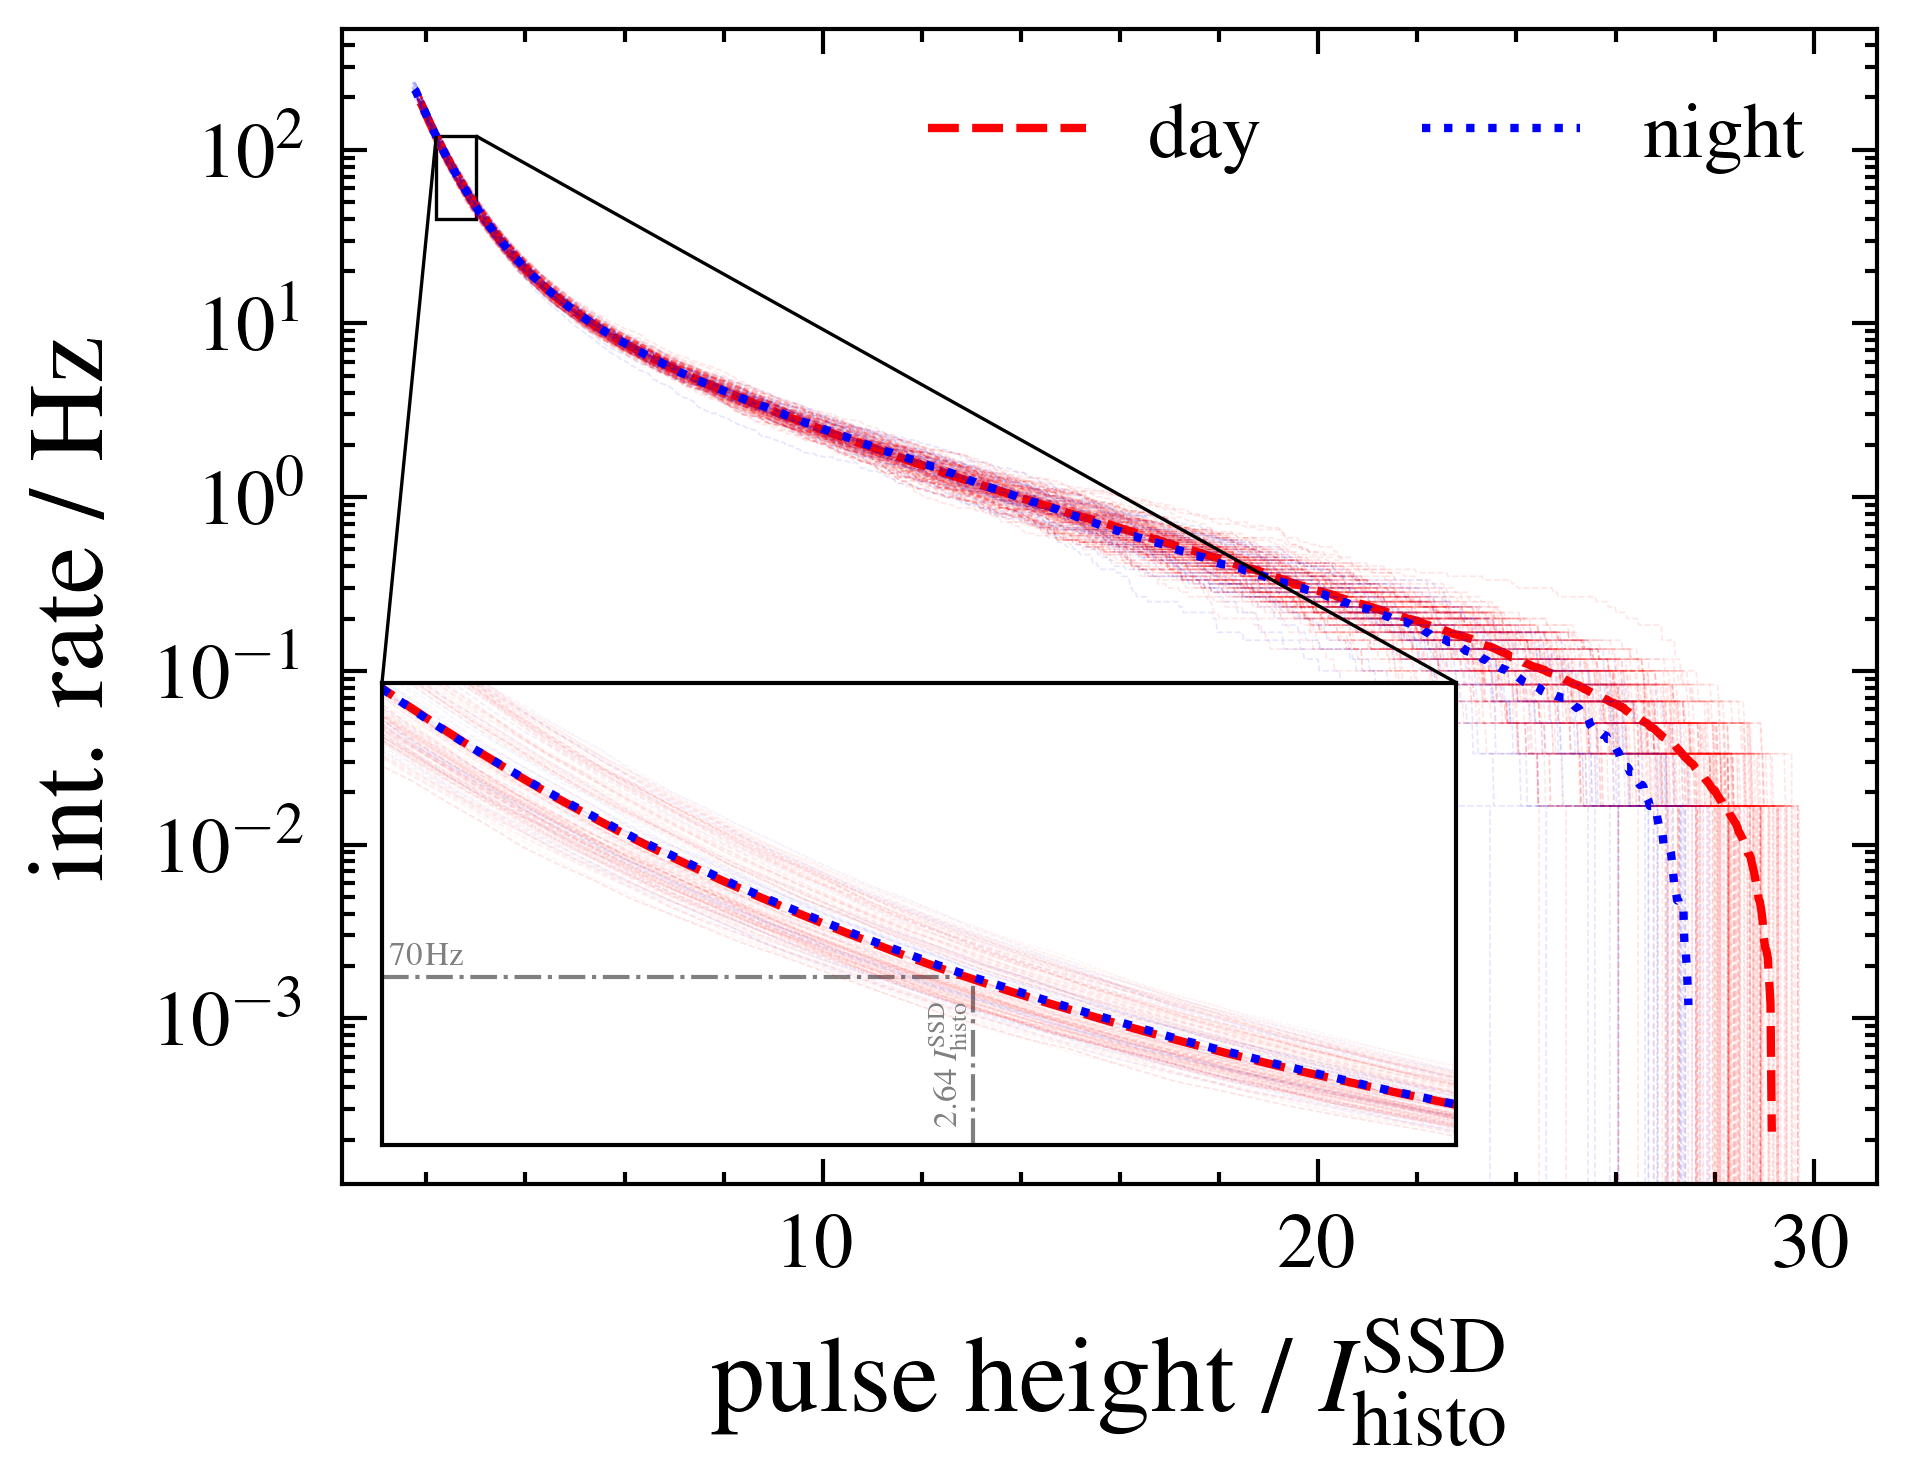

In [78]:
import os 
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

ax = plt.gca()
# ax_zoomed = zoomed_inset_axes(ax, 20, loc=3, axes_kwargs={'aspect' : 0.01})
ax_zoomed = inset_axes(ax, "70%", "40%", 3)
mark_inset(ax, ax_zoomed, loc1=2, loc2=1, lw=0.4, ec='k')

set_plt_style('double tex')

day_path = '/cr/data01/filip/Data/muonAcquisition/day/'
night_path = '/cr/data01/filip/Data/muonAcquisition/night/'
day_events, night_events = os.listdir(day_path), os.listdir(night_path)

stations = set([i.split('_')[1] for i in day_events] + [i.split('_')[1] for i in night_events])
xx, yy = np.zeros((2, 1024))

for events, path, c, ls in zip([day_events, night_events], ['day', 'night'], ['r', 'b'], ['--', ':']):
    avg_x, avg_y = np.zeros(1024), np.zeros(1024)
    n_events = 0

    for event in events:

        try:
            rates, offset = read_file(event, path)
            x = range(offset, offset + len(rates)) / np.mean(t3_mip[path][event.split('_')[1]])
            avg_y += rates
            n_events += 1
            avg_x += x

            ax.plot(x, rates, c=c, ls='--', lw=0.2, alpha=0.1)
            ax_zoomed.plot(x, rates, c=c, ls='--', lw=0.2, alpha=0.04)

        except ValueError as e: print(e, path, event)

    ax.plot(avg_x / n_events, avg_y / n_events, c=c, ls=ls, label=path)
    ax_zoomed.plot(avg_x / n_events, avg_y / n_events, c=c, ls=ls, label=path)
    xx += avg_x / (2 * n_events)
    yy += avg_y / (2 * n_events)

ax_zoomed.axhline(69, c='gray', ls='-.', lw=0.5, xmax=0.55, zorder=0)
ax_zoomed.axvline(2.64, c='gray', ls='-.', lw=0.5, ymax=0.36, zorder=0)

ax.set_yscale('log')
ax.set_ylabel('int. rate / Hz')
ax.set_xlabel('pulse height / $I^\mathrm{SSD}_\mathrm{histo}$')
ax.legend(ncols=2)

ax_zoomed.text(2.2 + 0.005, 70, 
               "$70\,\mathrm{Hz}$", 
               horizontalalignment='left', 
               verticalalignment='bottom',
               fontdict={'fontsize' : 4},
               c='gray')
ax_zoomed.text(2.64 - 0.005, 40 + 3, 
               "$2.64\ I_\mathrm{histo}^\mathrm{SSD}$", 
               horizontalalignment='right', 
               verticalalignment='bottom',
               fontdict={'fontsize' : 4},
               rotation=90,
               c='gray')

ax_zoomed.set_ylim(40, 120)
ax_zoomed.set_xlim(2.2, 3)
ax_zoomed.set_yticks([])
ax_zoomed.set_xticks([])


# diff = np.diff(plt.gca().get_xlim())[0]
# plt.axhline(70, xmax=2.64/diff)

# plt.xlim(1, 10)
# plt.ylim(1, 1000)
# plot.preliminary(plt.gcf())
# np.savetxt('/cr/data01/filip/Data/muonAcquisition/mean_rates_t3_mip.txt', np.vstack([xx, yy]).T)

11:50:38 (  +24.9s) [DEBUG  ] -- font size set to 9.5
11:50:38 (    +2ms) [DEBUG  ] -- label size set to 13.0
11:50:38 (    +0ms) [DEBUG  ] -- figure size set to [3.3, 2.5]
11:50:38 (    +1ms) [DEBUG  ] -- markersize set to 2.0
11:50:38 (    +1ms) [DEBUG  ] -- usetex set to True


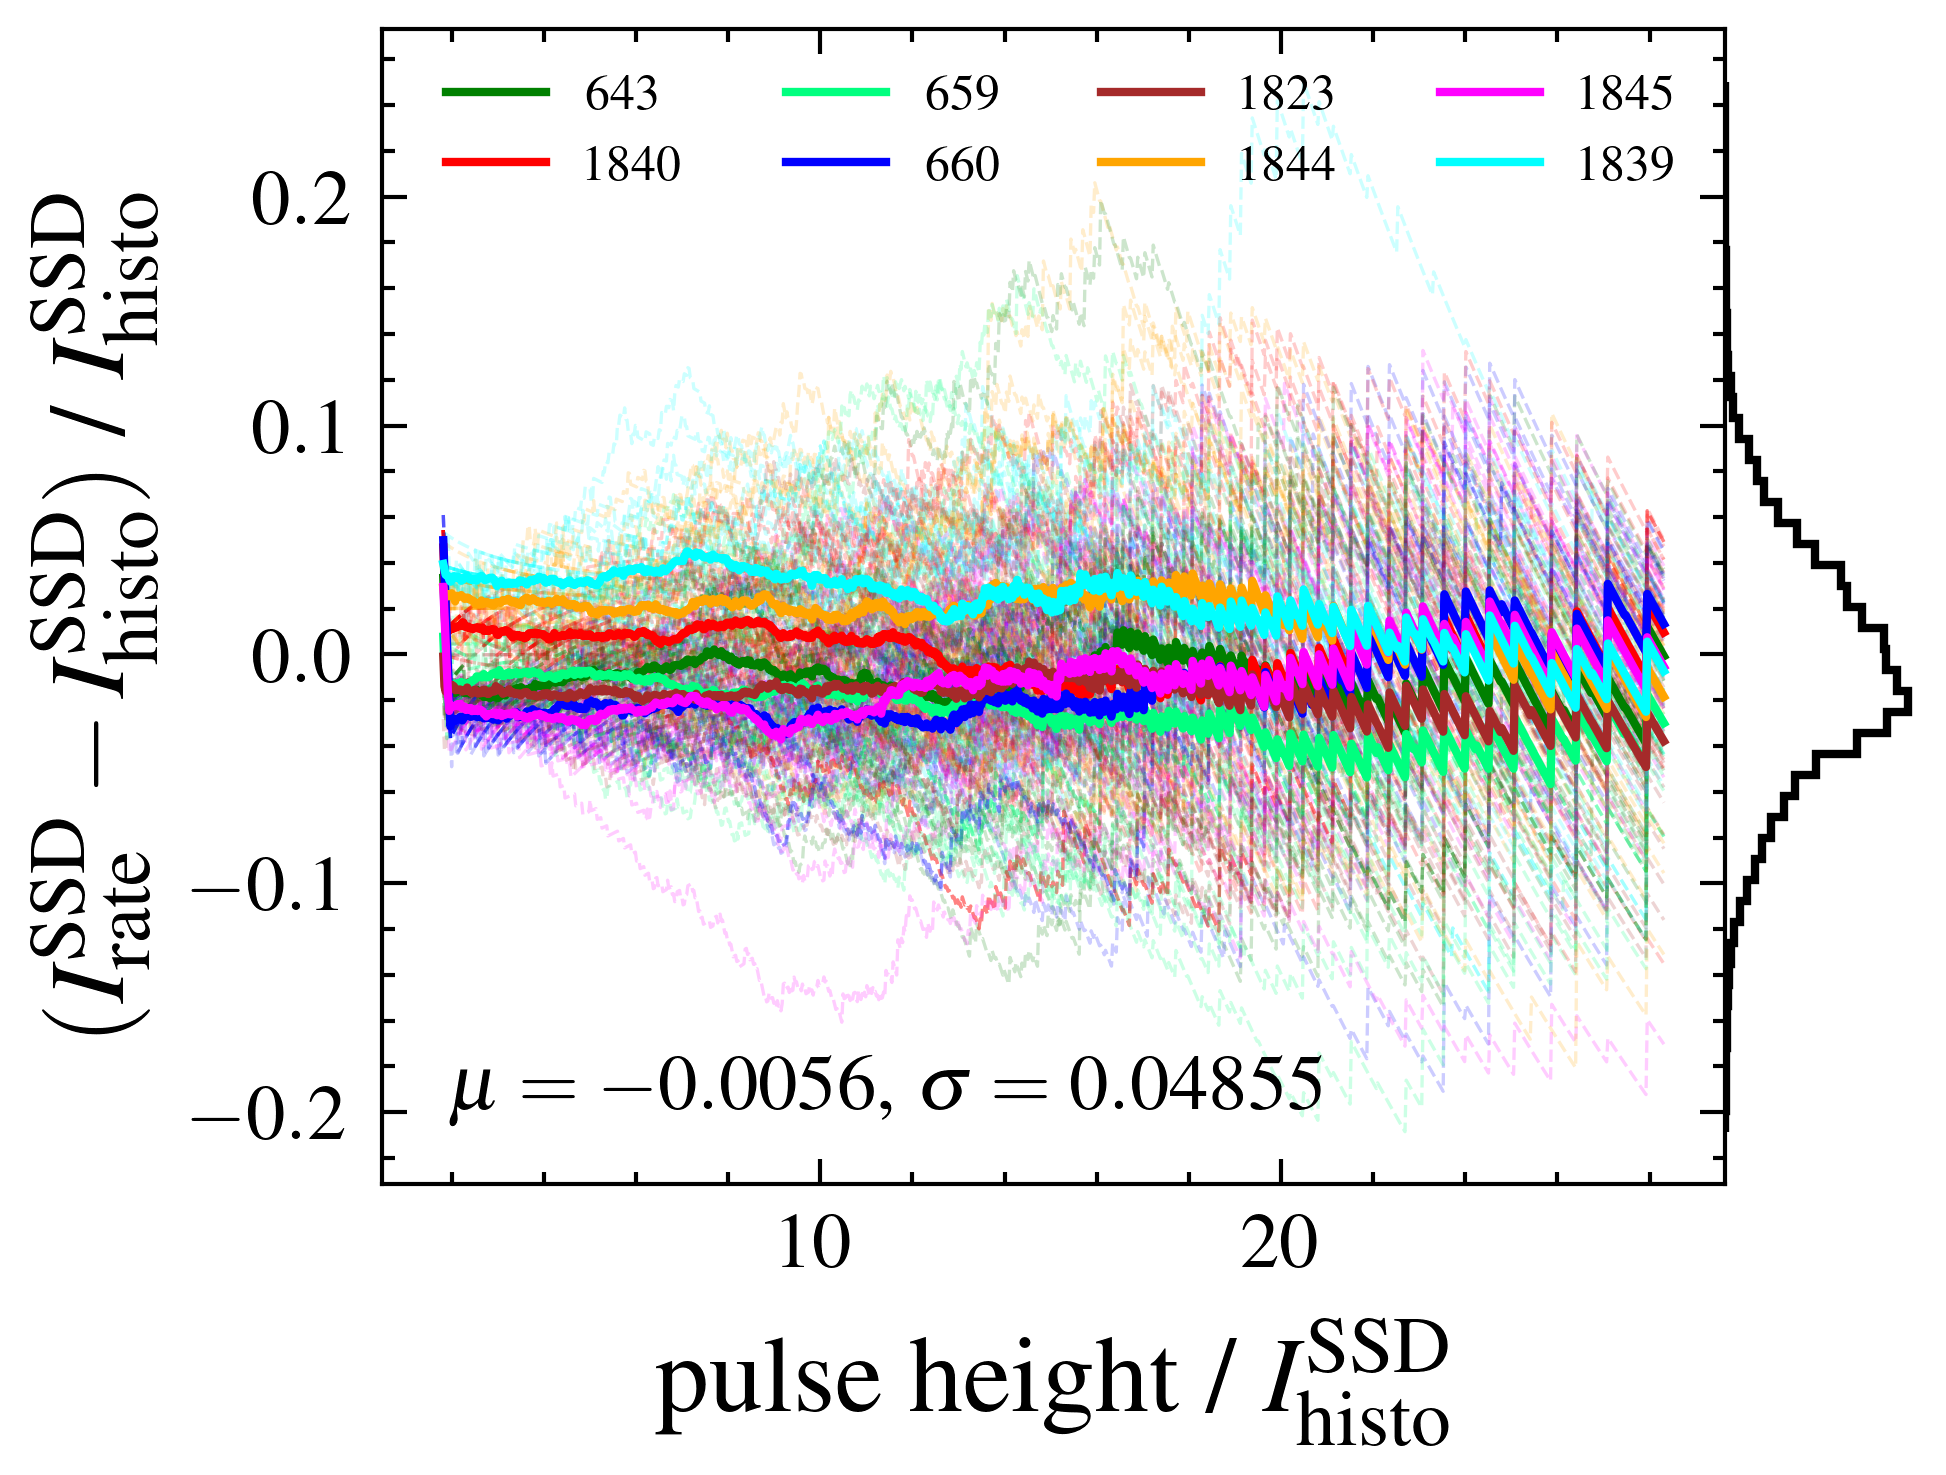

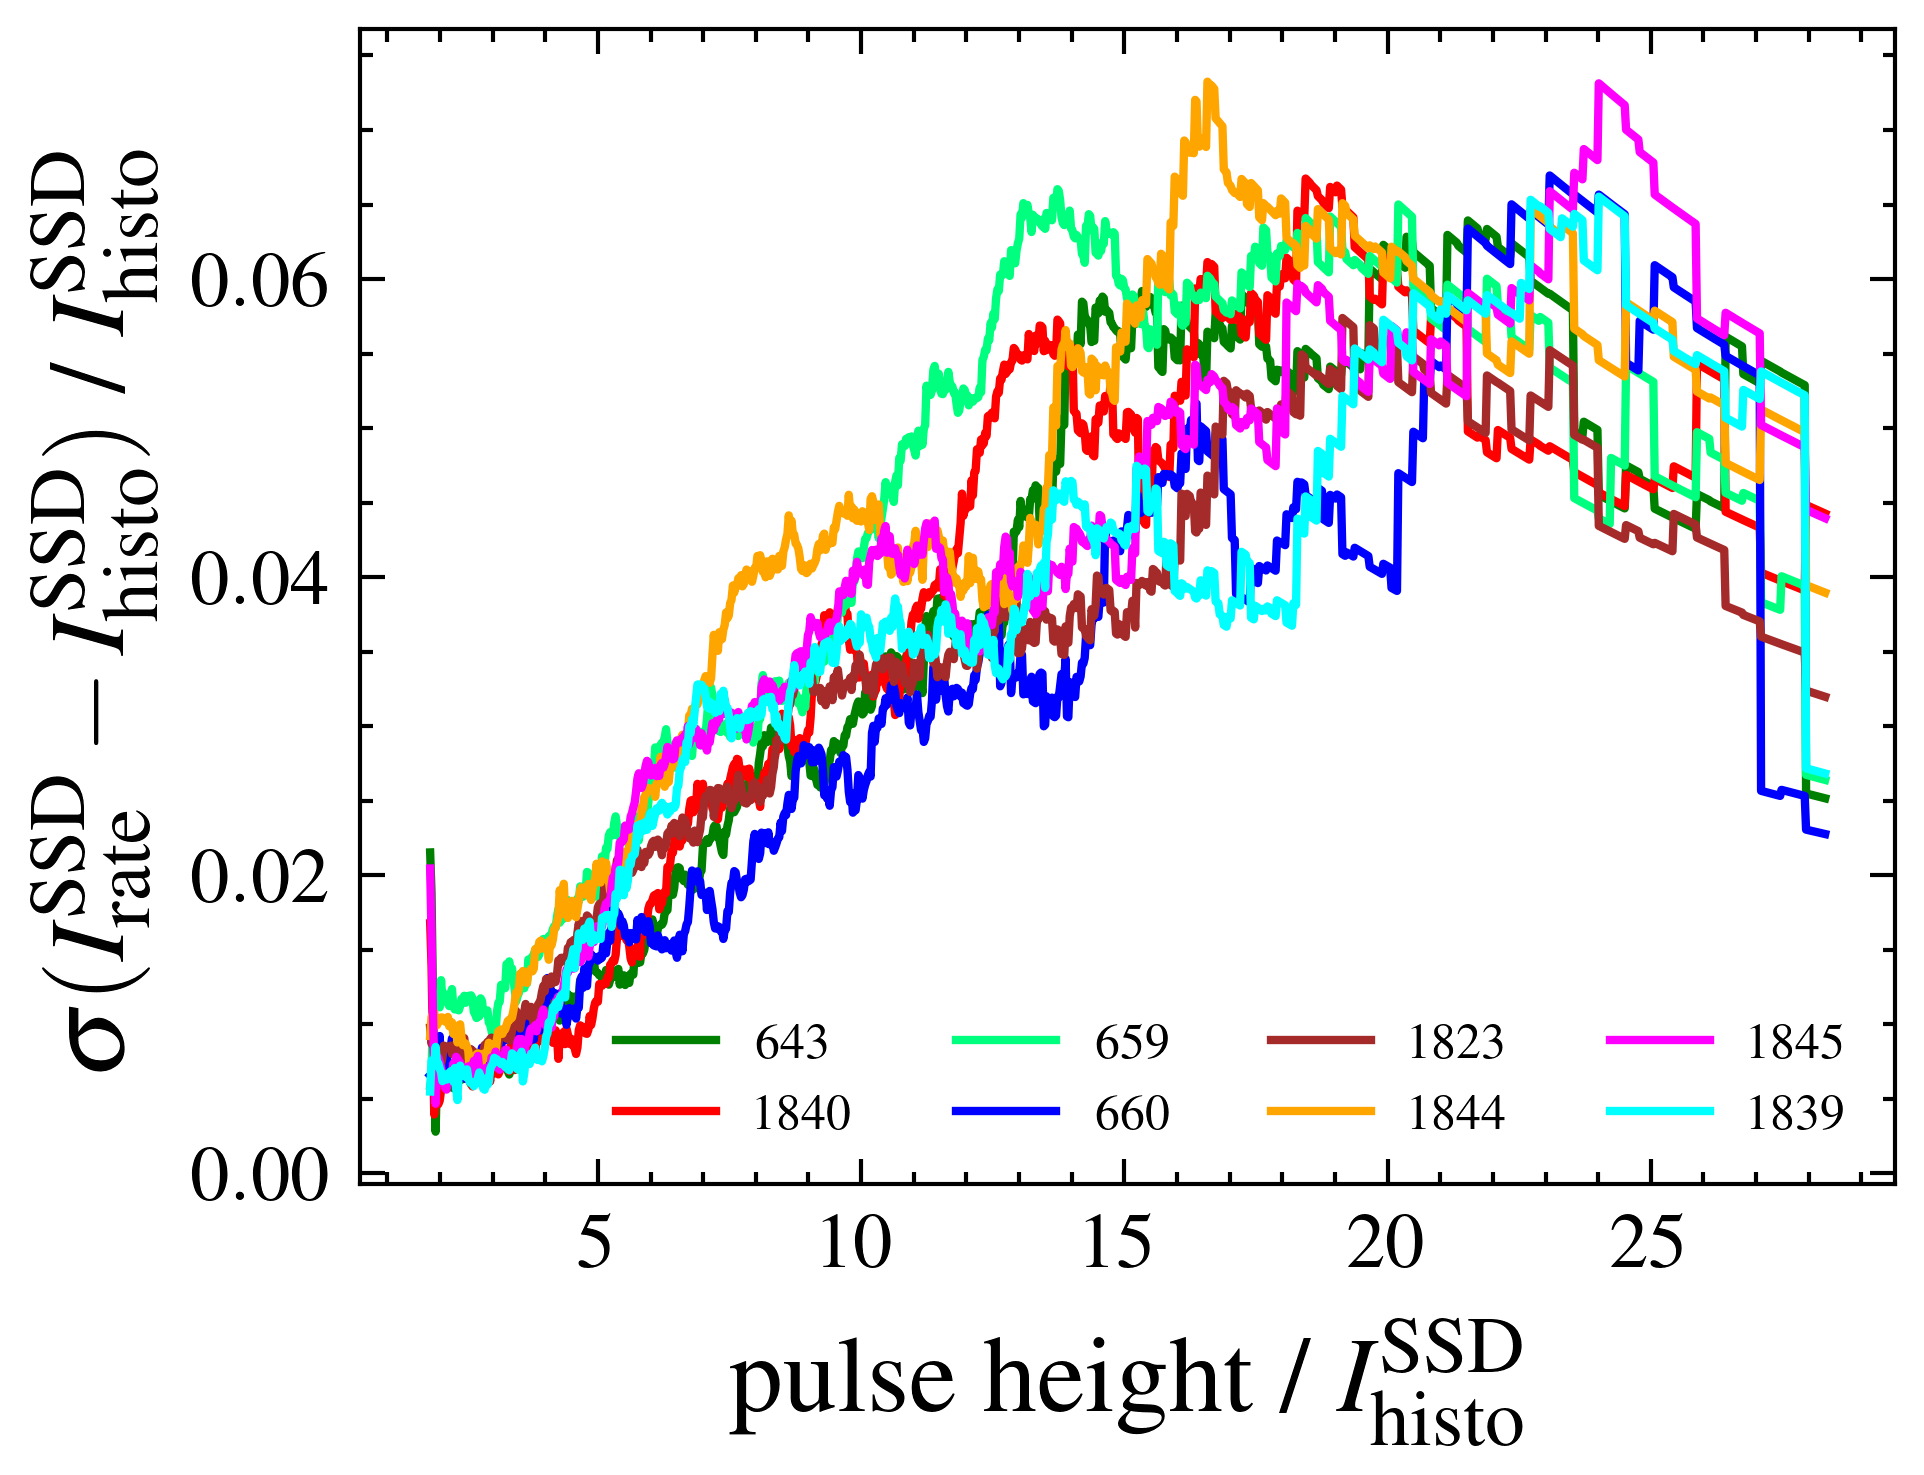

In [7]:
import os

colors = {
    '643' : 'green',
    '1840' : 'red',
    '659' : 'springgreen',
    '660' : 'blue',
    '1823' : 'brown',
    '1844' : 'orange',
    '1845' : 'magenta',
    '1839' : 'cyan'
}

set_plt_style('double tex')

def get_overlap(bins1, bins2):
    _low, _high = 0, -1
    bins1 = np.array(bins1)
    bins2 = np.array(bins2)

    min1, max1 = np.min(bins1), np.max(bins2)
    min2, max2 = np.min(bins2), np.max(bins2)

    if min1 < min2: _low = np.argmin(np.abs(bins1 - bins2))
    if max1 > max2: _high = np.argmin(np.abs(bins1 - bins2))

    return _low, _high

def online_predict(rate, rates2, bins1, bins2):

    min_rate_sep = np.argmin(np.abs(rate - rates2))
    print(min_rate_sep)
    corresponding_bin = bins2[min_rate_sep]

    return bins1[np.argmin(np.abs(corresponding_bin - bins1))]

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, width_ratios=[7, 1])

mean_bins, mean_rate = np.loadtxt('/cr/data01/filip/Data/muonAcquisition/mean_rates_t3_mip.txt', unpack=True)
stations = {x : [] for x in colors.keys()}

for directory in ['day', 'night']:
    path = f'/cr/data01/filip/Data/muonAcquisition/{directory}/'
    for file in os.listdir(path):
        timestamp, station = file.split('_')
        offline_mip = np.mean(t3_mip[directory][station])

        x_values = range(offset, offset + 1024)
        ssd_rates, offset = read_file(file, directory)
        _low, _high = get_overlap(x_values, mean_bins)

        x_values = x_values[_low:_high]
        ssd_rates = ssd_rates[_low:_high]

        performance = []
        for rate, _bin in zip(mean_rate, mean_bins):
            online_mip = x_values[np.argmin(np.abs(rate - ssd_rates))] / _bin
            performance.append( (online_mip - offline_mip) / offline_mip )

        stations[station].append(performance)

        ax1.plot(mean_bins, performance, ls='--', c=colors[station], lw=0.4, alpha=0.2)

predictions_flat = []
fig2, ax3 = plt.subplots()
for station in colors.keys():
    ax1.plot(mean_bins, np.mean(stations[station], axis=0), 
             c=colors[station], 
             ls='solid',
             label=station)
    for event in stations[station]:
        predictions_flat += event

    ax3.plot(mean_bins, np.std(stations[station], axis=0), c=colors[station], ls='solid', label=station)

ax1.legend(ncol=4, fontsize=6)
ax2.hist(predictions_flat, orientation='horizontal', bins=50, histtype='step')
ax2.axis('off')
ax1.text(0.05, 0.05, 
fr'$\mu = {np.mean(predictions_flat):.4f}$, $\sigma = {np.std(predictions_flat):.5f}$', 
ha='left', va='bottom', 
transform=ax1.transAxes)
fig.subplots_adjust(wspace=0)

ax1.set_xlabel('pulse height / $I^\mathrm{SSD}_\mathrm{histo}$')
ax1.set_ylabel('$(I^\mathrm{SSD}_\mathrm{rate} - I^\mathrm{SSD}_\mathrm{histo})$ / $I^\mathrm{SSD}_\mathrm{histo}$')

ax3.set_xlabel('pulse height / $I^\mathrm{SSD}_\mathrm{histo}$')
ax3.set_ylabel('$\sigma(I^\mathrm{SSD}_\mathrm{rate} - I^\mathrm{SSD}_\mathrm{histo})$ / $I^\mathrm{SSD}_\mathrm{histo}$')
ax3.legend(ncol=4, fontsize=6)


Text(0.5, 0, 'pulse height / $I^\\mathrm{SSD}_\\mathrm{histo}$')

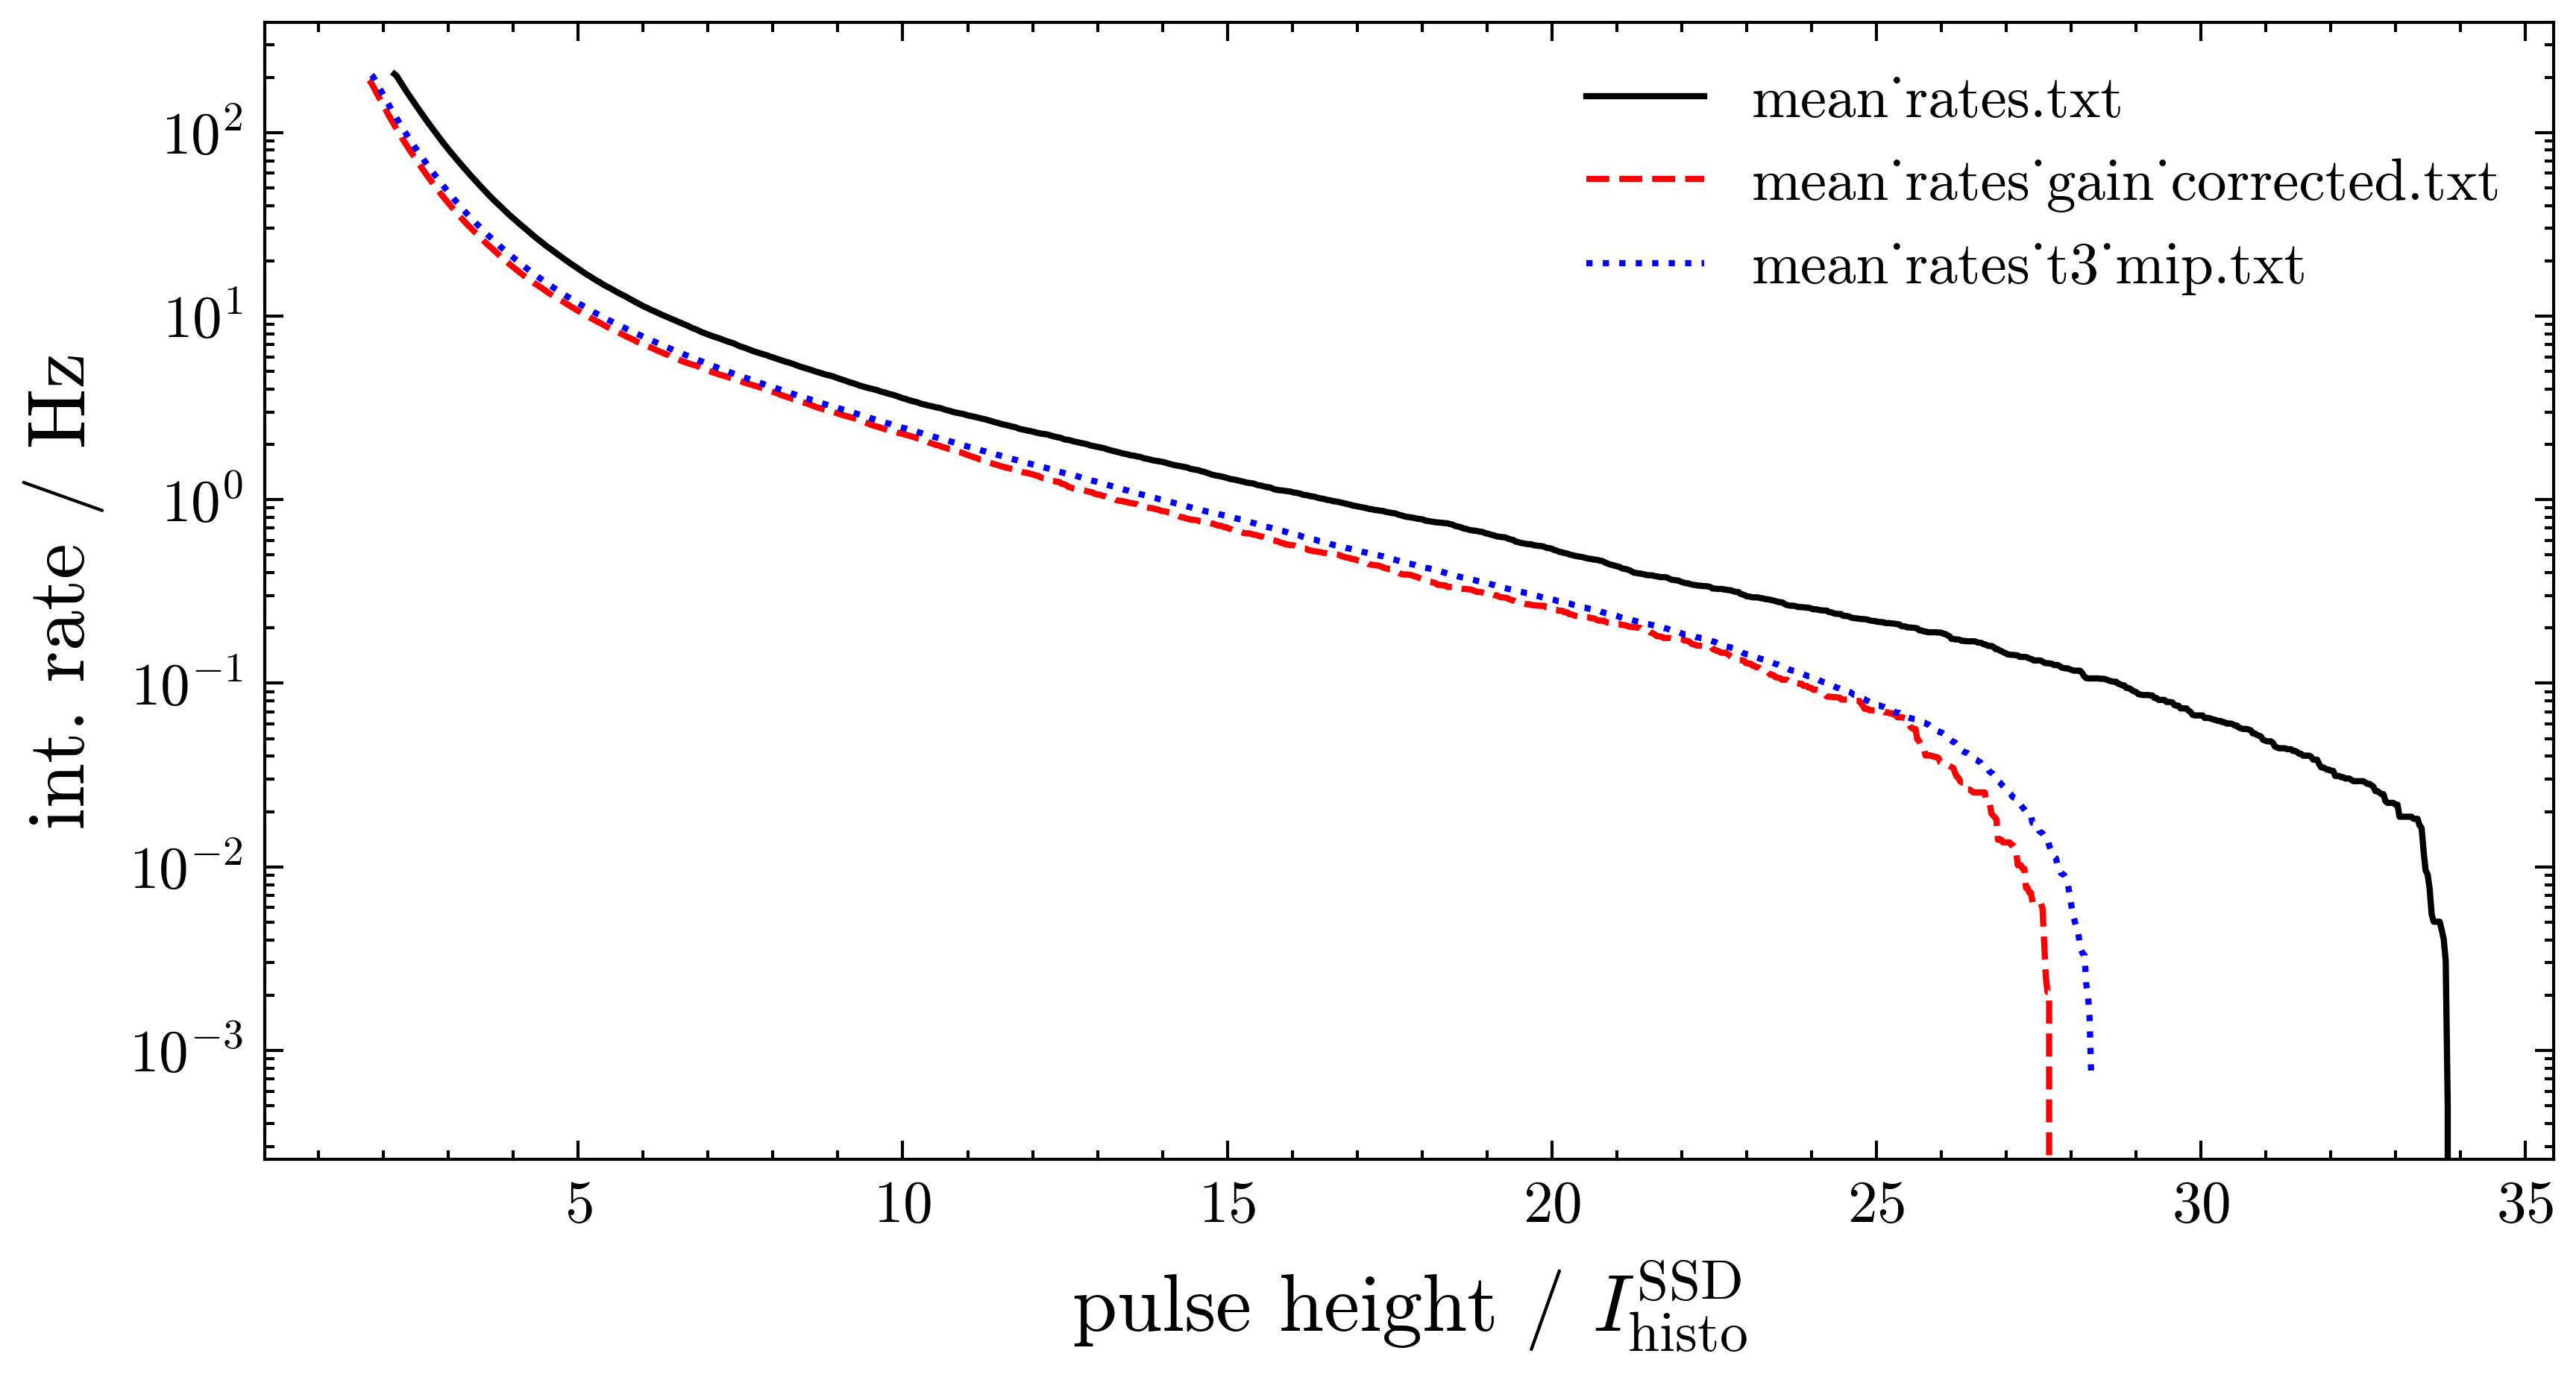

In [52]:
for file in os.listdir('/cr/data01/filip/Data/muonAcquisition/'):
    if not file.endswith('.txt'): continue

    x, y = np.loadtxt('/cr/data01/filip/Data/muonAcquisition/' + file, unpack=True)

    plt.plot(x, y, label=file)

plt.legend()
plt.yscale('log')
plt.ylabel('int. rate / Hz')
plt.xlabel('pulse height / $I^\mathrm{SSD}_\mathrm{histo}$')

# raw mip values

In [ ]:
import polars as pl

SSD_PEAK_HISTO_BINNING = np.array([2*k for k in range(100)] + [200 + 8*k for k in range(51)])
SSD_HISTO_BIN_CENTERS = 0.5 * (SSD_PEAK_HISTO_BINNING[1:] + SSD_PEAK_HISTO_BINNING[:-1])

# _ = plt.xticks(range(len(mips['day'])), list(mips['day'].keys()))



for color, dir in zip(['red', 'blue'], ['day', 'night']):

plt.scatter([],[], label='day', c='r')
plt.scatter([], [], facecolor='w', edgecolors='k', label='T3 histo')
plt.scatter([],[], label='night', c='b')

# plt.ylim(-0.1, 2)
plt.xticks(list(x_loc.values()), list(x_loc.keys()))
plt.legend(ncol=2)
plt.ylabel(r'$I^\mathrm{SSD}_\mathrm{histo} - \langle I^\mathrm{SSD}_\mathrm{histo}\rangle$ / $I^\mathrm{SSD}_\mathrm{histo}$')
plt.xlabel('Station ID')
plt.axhline(0, ls='--', c='k', zorder=0)

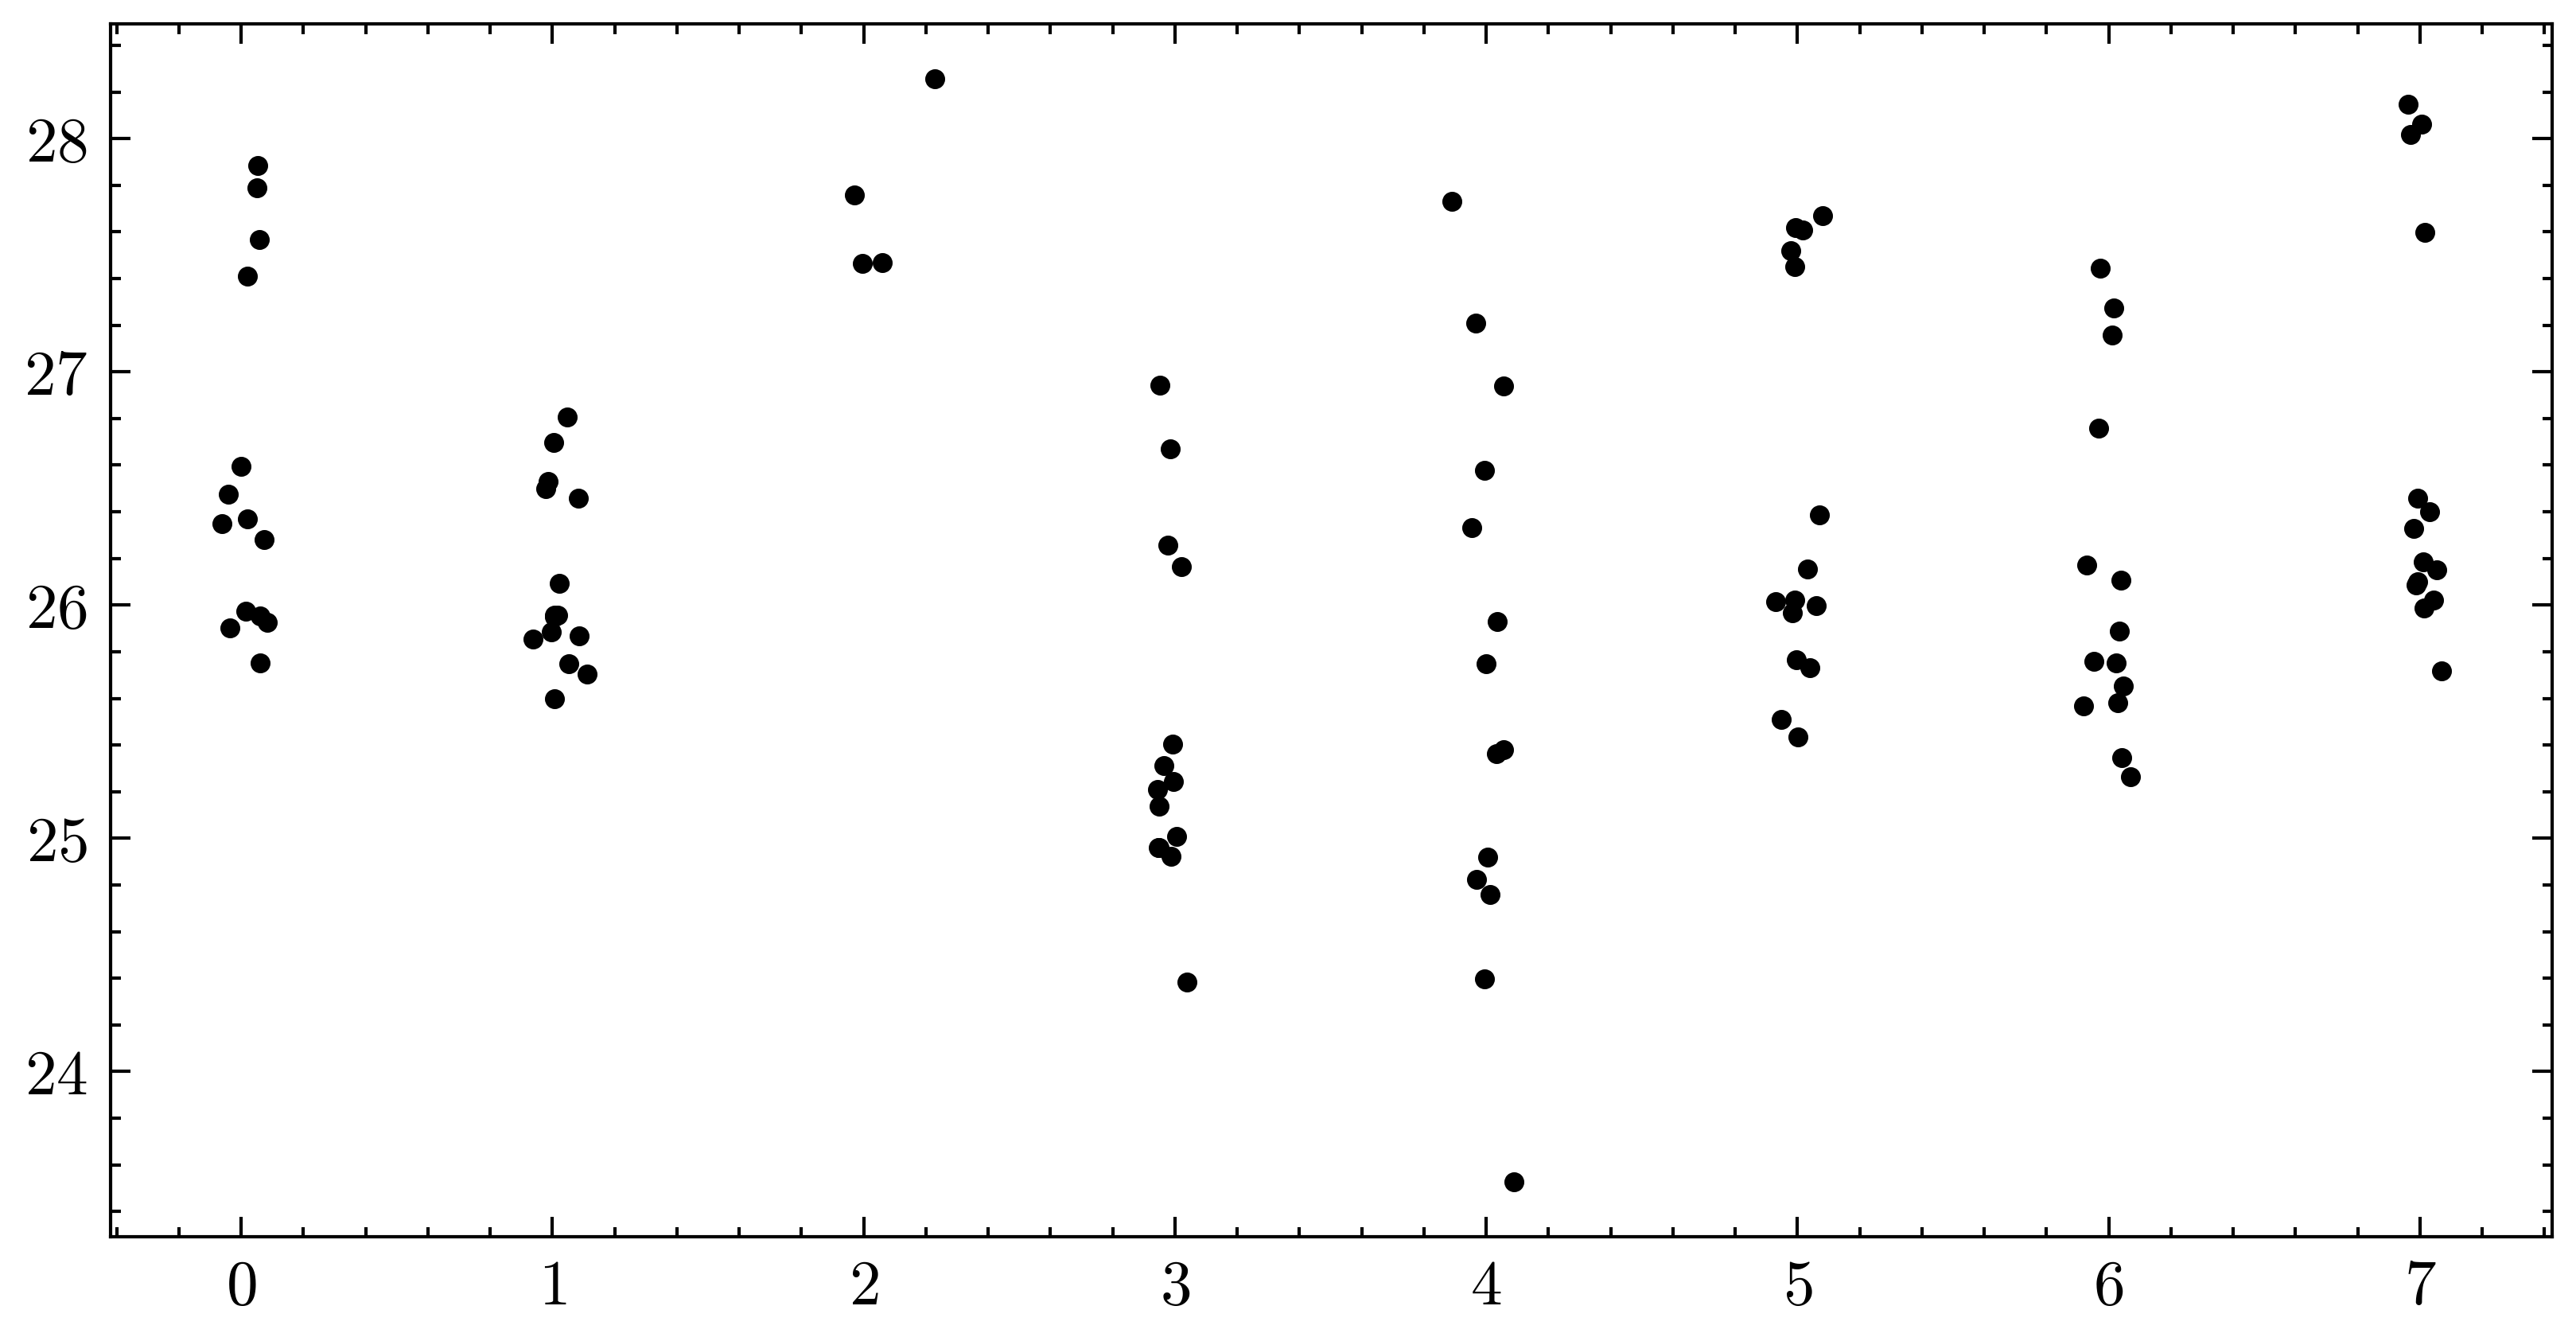

In [14]:
x_loc = { x : i for i, x in enumerate(list(t3_mip['day'].keys())) }

for time in ['day', 'night']:
    for station in t3_mip[time].keys():
        plt.scatter(x_loc[station] + np.random.normal(scale=0.05, 
                                                      size=len(t3_mip[time][station])),
                    1023 / np.array(t3_mip[time][station]),
                    c='k'
        )

In [4]:
mean_bins, mean_rate = np.loadtxt('/cr/data01/filip/Data/muonAcquisition/mean_rates_t3_mip.txt', unpack=True)

2.643131360614918


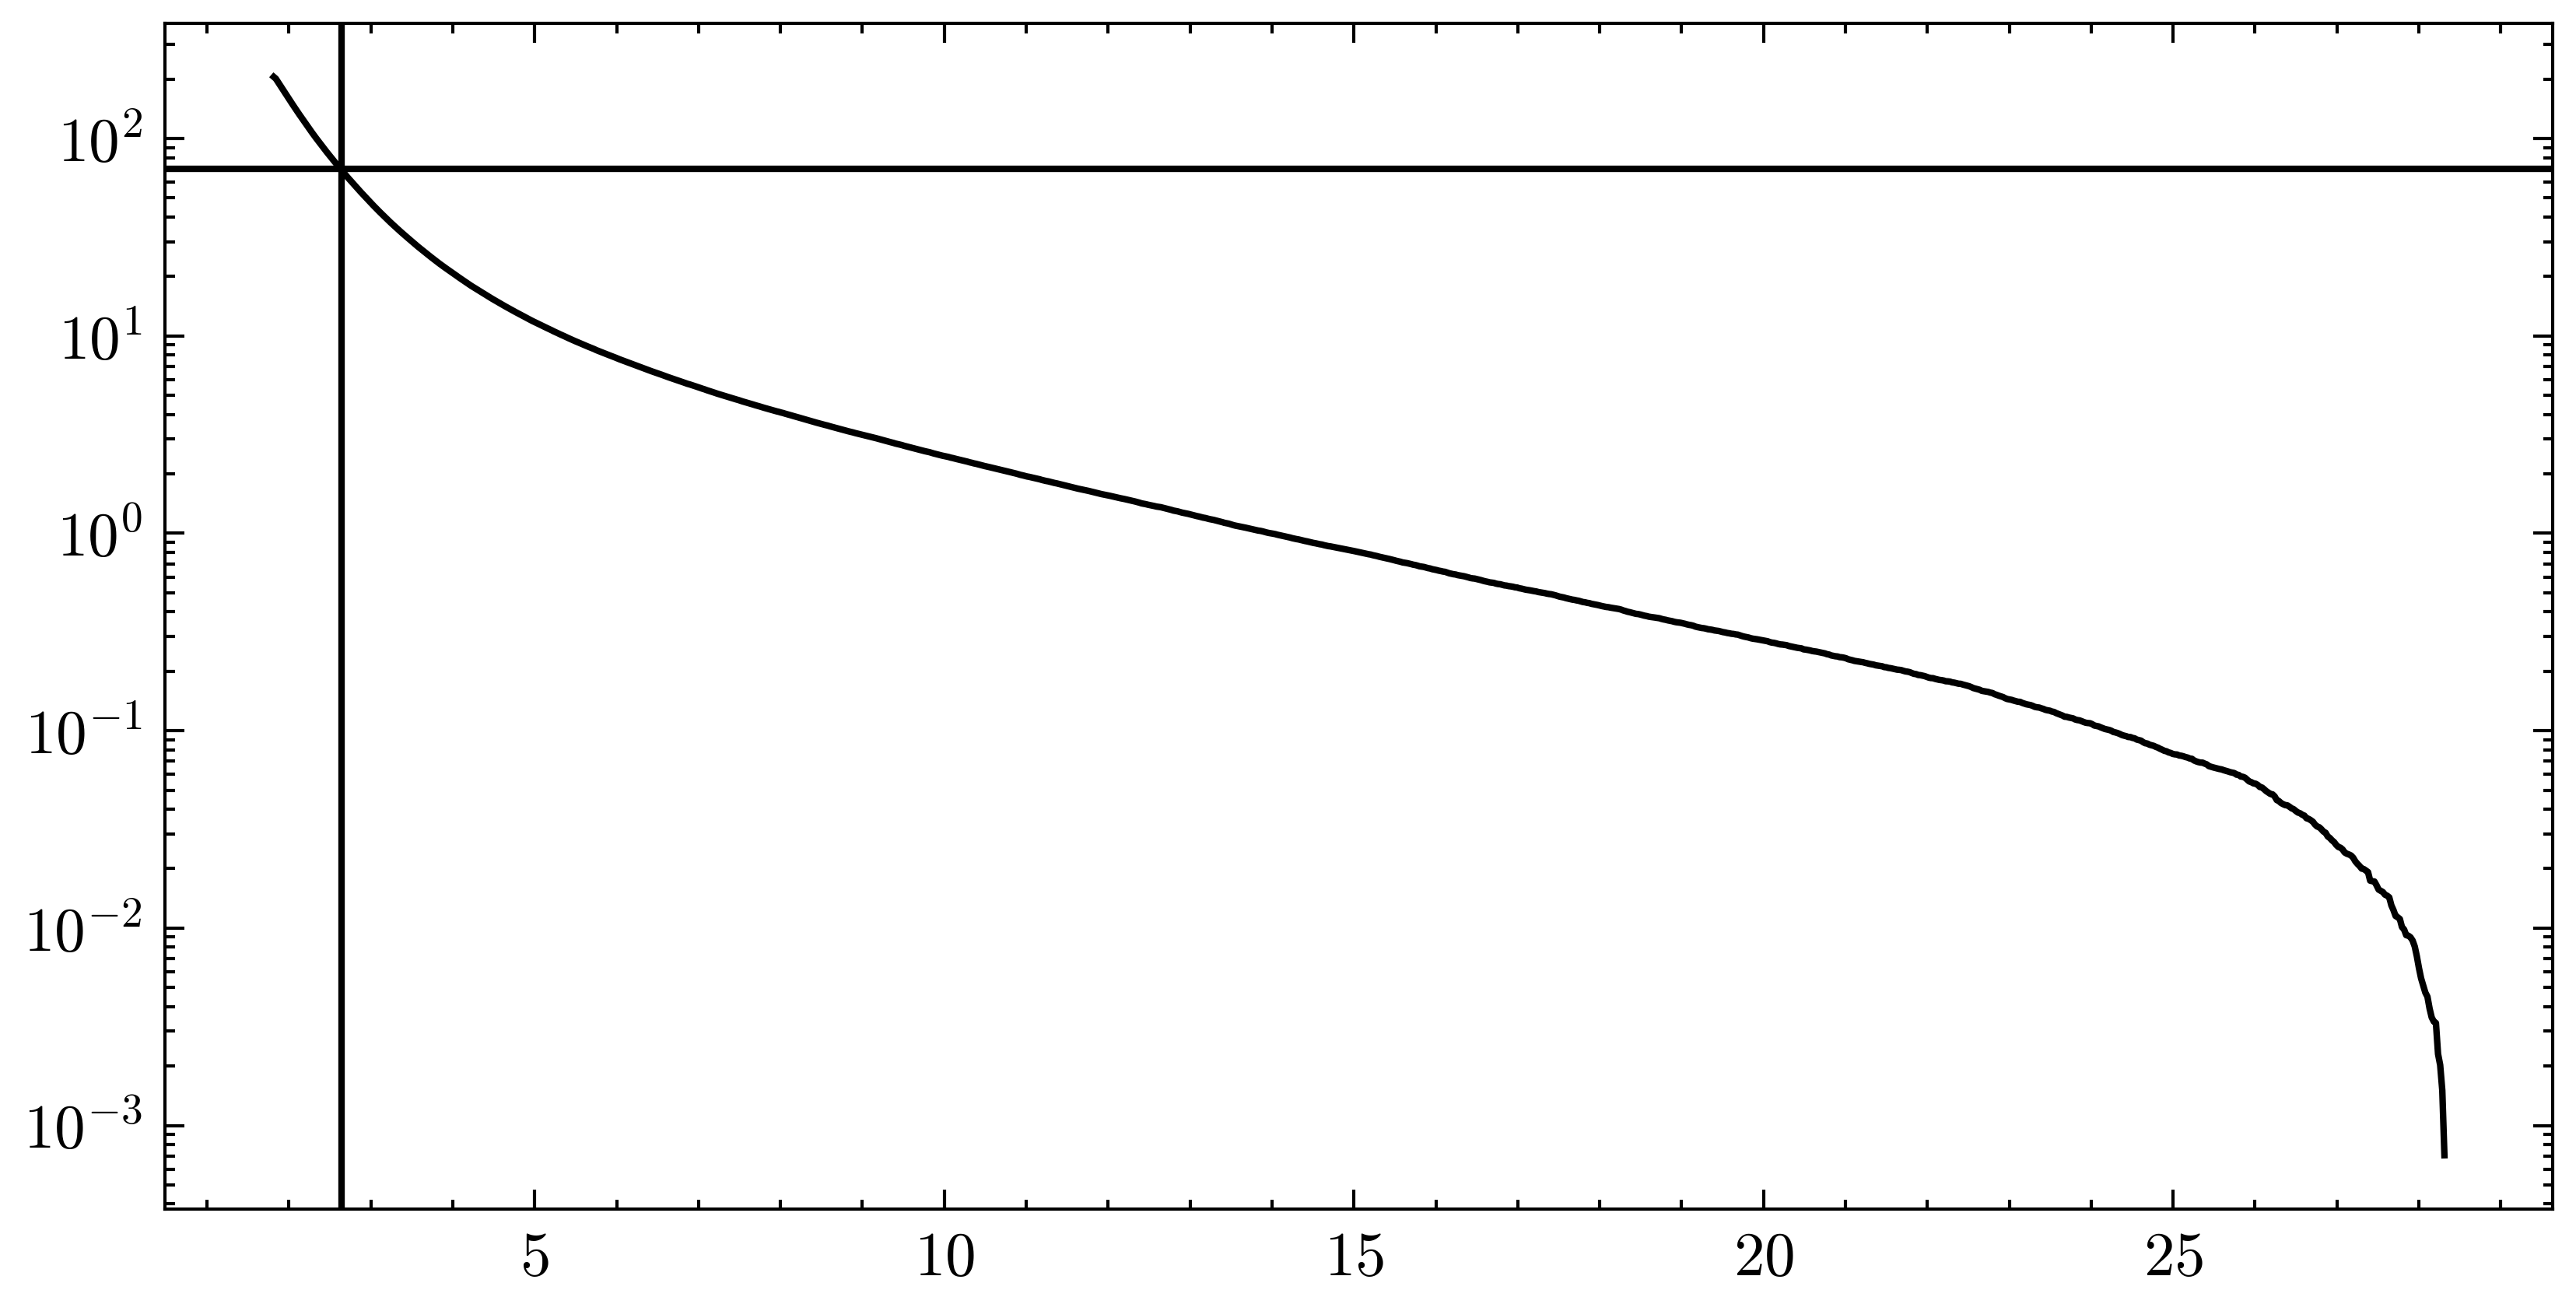

In [10]:
plt.plot(mean_bins, mean_rate)
plt.yscale('log')

plt.axhline(70)
plt.axvline(mean_bins[np.argmin(np.abs(mean_rate - 70))])

print(mean_bins[np.argmin(np.abs(mean_rate - 70))])
